This notebook follows the scikit-learn tutorial on statistical-learning for scientific data processing, at http://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index

# Statistical learning: the setting and the estimator object in scikit-learn
http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html

The iris dataset has 150 observations of irises, each described by 4 features: their sepal and petal length and width.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
print(data.shape)

(150, 4)


#### Reshaping data to the form (n_samples, n_features)
The digits dataset needs to be reshaped from 8x8 images of hand-written digits to "feature vectors" of length 64.

(1797, 8, 8)


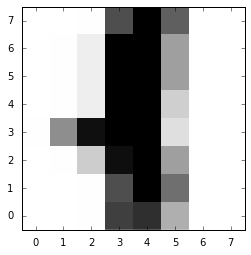

In [101]:
digits = datasets.load_digits()
print(digits.images.shape)
import pylab as pl 
%matplotlib inline
pl.imshow(digits.images[1], cmap=pl.cm.gray_r, interpolation='none')

In [5]:
data = digits.images.reshape((digits.images.shape[0],-1))
print(data.shape)

(1797, 64)


# Supervised Learning

Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

In [6]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

### k-Nearest neighbors classifier

The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector. (Please see the Nearest Neighbors section of the online Scikit-learn documentation for more information about this type of classifier.)

In [7]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

knn.predict(iris_X_test)

iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Support Vector Machines

Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the observations around the separating line (more regularization); a large value for C means the margin is calculated on observations close to the separating line (less regularization).

Exercise:

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.
Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.
Hint: You can use the decision_function method on a grid to get intuitions.
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

In [14]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
#print(iris_X) #Feature vector (or data): Measured petal and sepal lengths and widths.
#print(iris_y) #Labels (or target): 3 types of irises (Setosa, Versicolour, and Virginica)
print(iris_X.shape, iris_y.shape) # Split into train and test set, with 140 training examples and 10 test cases.
print(iris_X_train.shape, iris_y_train.shape)

(150, 4) (150,)
(140, 4) (140,)


In [15]:
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2] #Only use the first two features (petal length and width).
y = y[y != 0] #Only classify irises between classes 1 and 2.
print(X.shape, y.shape)


(100, 2) (100,)


-10

In [105]:
np.random.seed(1) #Same training/test set each time I run this cell.
random_ind = np.random.permutation(len(X)) #Train using a random 90% of the data, and test with 10%
X_train = X[random_ind[:np.int(-0.10 * len(X))]] #90% of data
y_train = y[random_ind[:np.int(-0.10 * len(y))]]
X_test = X[random_ind[np.int(-0.10 * len(X)):]] #10% of data
y_test = y[random_ind[np.int(-0.10 * len(y)):]] #10% of data

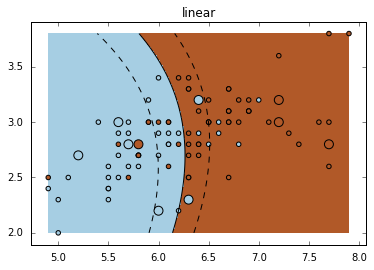

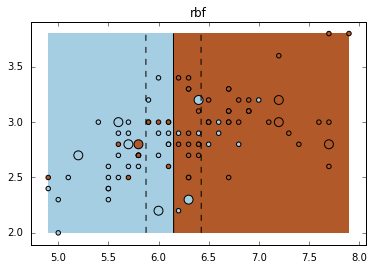

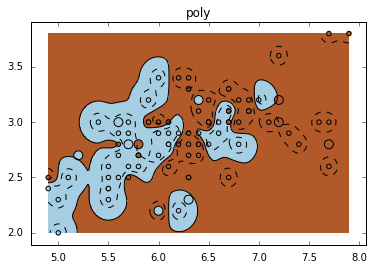

In [108]:
from sklearn import svm
import matplotlib.pyplot as plt
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    svc = svm.SVC(kernel=kernel, gamma=100)
    svc.fit(X_train, y_train)
    plt.figure(fig_num)
    plt.clf()
    
    x_min = X[:,0].min()
    x_max = X[:,0].max()
    y_min = X[:,1].min()
    y_max = X[:,1].max()
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired) #Plot each petal width vs. length, with color indicating class.
    plt.scatter(X_test[:,0], X_test[:,1], s=80, c=y_test, cmap=plt.cm.Paired) #Larger circles show test data
    plt.title(kernel)
plt.show()



(-2+0j)
